# A Method of Moments for Gaussian HMMs

In [1]:
import mom
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Make some test data
N = 10000
mu1 = [2, 4]
mu2 = [1, 5]
cov = np.eye(2) * 0.25
x1 = np.random.multivariate_normal(mu1, cov, N//2)
x2 = np.random.multivariate_normal(mu2, cov, N//2)

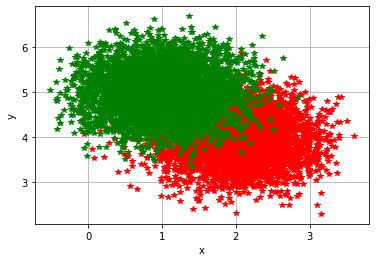

In [3]:
# Plot
plt.subplot(111)
plt.plot(x1[:, 0], x1[:, 1], '*r')
plt.plot(x2[:, 0], x2[:, 1], '*g')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [4]:
# Gather data by alternating sequences 
X = np.vstack([np.vstack([x1[i:i+50], x2[i:i+50]])
               for i in range(0, 10000, 50)])

In [5]:
# Run 500 iterations and average
output = []
niter = 500
failed = 0

for i in range(niter):
    output += [mom.run(X, 2)]  # use verbose = True to get errors

    if i % 50 == 0:
        print(i)

C:\Users\chswa\OneDrive - Ørsted\DTU\semester_2\hmm_specialkursus\method-of-moments\mom.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  L[0], R3 = scipy.linalg.eig(B312[0])


0
50
100
150
200
250
300
350
400
450


In [6]:
O = [O_iter for O_iter, _ in output if O_iter is not None]
T = [T_iter for _, T_iter in output if T_iter is not None]

In [7]:
print(f'number of times successfully inverting R3: {len(O)} / {niter}')
print(f'number of times successfully calculating T: {len(T)} / {niter}')

number of times successfully inverting R3: 499 / 500
number of times successfully calculating T: 237 / 500


In [8]:
print(f'average estimated means:\n{sum(O) / len(O)}\n')
print(f'average estimated transition probability matrix:\n{sum(T) / len(T)}\n')

average estimated means:
[[1.00154227 2.00049545]
 [4.99845562 3.98359392]]

average estimated transition probability matrix:
[[0.97374734 0.02390522]
 [0.02625266 0.97609478]]

